### Examine using hierarchical clustering - all three methods seem to produce hundreds of clusters

# CITATION LOCATION - clustering analysis

### IMPORT LIBRARIES AND DATA

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime
import glob
pd.set_option('display.max_columns', None)
sns.set(style='darkgrid')
# plt.style.use('bmh')
plt.rcParams['patch.edgecolor'] = 'none'
import jenkspy

import hdbscan
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read in data that has already been preprocessed
df = pd.read_csv('data/clustering_features.csv')

In [3]:
df.shape

(36626, 11)

In [4]:
df.head()

,beat,cited_person_age,citation_time,charge_description,street,month,day_of_week,week_of_year,hour_of_day,place_id,age_breaks
0,12.0,19.0,747,Speed Greater Than R&P or Posted,E Shea Bl,7,2,28,7,E Shea Bl - 6xxx,"(17.999, 24.0]"
1,12.0,36.0,800,Speed Greater Than R&P or Posted,E Shea Bl,7,2,28,8,E Shea Bl - 6xxx,"(30.0, 39.0]"
2,7.0,61.0,853,Speed Greater Than R&P or Posted,N Goldwater Bl,7,2,28,8,N Goldwater Bl - 4xxx,"(51.0, 97.0]"
3,7.0,59.0,843,Speed Greater Than R&P or Posted,N Goldwater Bl,7,3,28,8,N Goldwater Bl - 4xxx,"(51.0, 97.0]"
4,19.0,23.0,2215,Speed Greater Than R&P or Posted,N Pima Rd,7,5,27,22,N Pima Rd - 2xxx,"(17.999, 24.0]"


In [5]:
# drop place id for the time being
df.drop(['place_id'], axis=1, inplace=True)

In [6]:
# drop features I don't want to use for now
df.drop(['citation_time'], axis=1, inplace=True)
# df.drop(['age_breaks'], axis=1, inplace=True)
# df.drop(['beat'], axis=1, inplace=True)
df.drop(['cited_person_age'], axis=1, inplace=True)

In [7]:
df.drop(['street'], axis=1, inplace=True)

In [8]:
# drop citations where beat is null
# otherwise this creates problems for modeling

df.drop(df[df.beat.isnull()].index, inplace=True)

In [9]:
df.head()

,beat,charge_description,month,day_of_week,week_of_year,hour_of_day,age_breaks
0,12.0,Speed Greater Than R&P or Posted,7,2,28,7,"(17.999, 24.0]"
1,12.0,Speed Greater Than R&P or Posted,7,2,28,8,"(30.0, 39.0]"
2,7.0,Speed Greater Than R&P or Posted,7,2,28,8,"(51.0, 97.0]"
3,7.0,Speed Greater Than R&P or Posted,7,3,28,8,"(51.0, 97.0]"
4,19.0,Speed Greater Than R&P or Posted,7,5,27,22,"(17.999, 24.0]"


In [11]:
beat_16 = df[df.beat == 16]

In [12]:
beat_16

,beat,charge_description,month,day_of_week,week_of_year,hour_of_day,age_breaks
20,16.0,Drug Paraphernalia-Possess/Use,7,0,29,22,"(24.0, 30.0]"
89,16.0,Expired/No Arizona Registration,7,5,28,12,"(24.0, 30.0]"
123,16.0,Speed Greater Than R&P or Posted,7,3,28,4,"(30.0, 39.0]"
135,16.0,Suspended/Revoked D.L.,7,2,29,23,"(24.0, 30.0]"
160,16.0,Speed Greater Than R&P or Posted,7,2,28,12,"(17.999, 24.0]"
...,...,...,...,...,...,...,...
36551,16.0,Fail to Obey Traffic Control Device,9,3,39,13,"(51.0, 97.0]"
36553,16.0,Fail to Obey Traffic Control Device,9,3,39,13,"(39.0, 51.0]"
36587,16.0,Speed Greater Than R&P or Posted,9,2,39,7,"(24.0, 30.0]"
36589,16.0,Failure to Control Speed to Avoid A Collision,10,2,40,15,"(51.0, 97.0]"


In [13]:
X = pd.get_dummies(beat_16.drop(['beat'], axis=1))

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### 1. Ward - In general, this method tends to find clusters of similar size

In [39]:
n_clusters = []

for i in [5, 20, 50, 75, 100, 300, 500, 700]:
    # Defining the agglomerative clustering
    # remember, ward only works with Euclidian
    agg_cluster = AgglomerativeClustering(linkage='ward', 
                                          affinity='euclidean',
                                          n_clusters=i)

    # Fit model
    clusters = agg_cluster.fit_predict(X_std)
    
    n_clusters.append(round(metrics.silhouette_score(X_std, clusters, metric='euclidean'), 3))

In [68]:
pd.DataFrame(list(zip([5, 20, 50, 75, 100, 300, 500, 700], n_clusters)))

,0,1
0,5,0.154
1,20,0.292
2,50,0.373
3,75,0.366
4,100,0.379
5,300,0.362
6,500,0.340
7,700,0.299


In [69]:
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                          affinity='euclidean',
                                          n_clusters=75)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

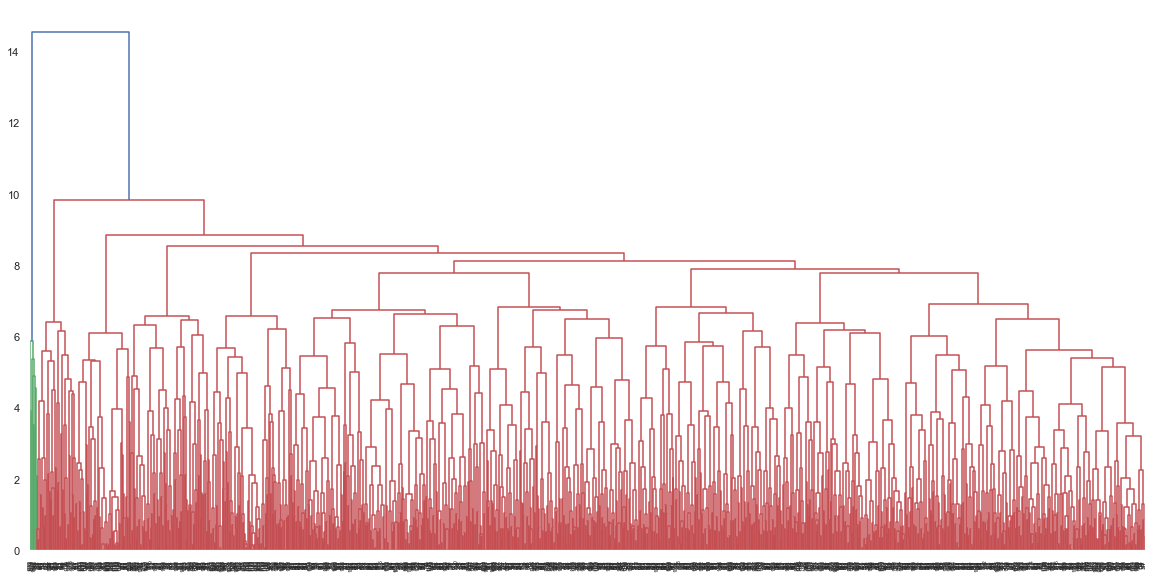

In [45]:
# visualize dendrogram
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

In [28]:
# examine silhouette score
round(metrics.silhouette_score(X_std, clusters, metric='euclidean'), 3)

0.374

### 2. Complete - Clusters tend to be comprised of highly similar observations, making the resulting groups quite compact.

In [17]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

In [46]:
n_clusters = []

for i in [5, 20, 50, 75, 100, 300, 500, 700]:
    # Defining the agglomerative clustering
    # remember, ward only works with Euclidian
    agg_cluster = AgglomerativeClustering(linkage='complete', 
                                          affinity='cosine',
                                          n_clusters=i)

    # Fit model
    clusters = agg_cluster.fit_predict(X_std)
    
    n_clusters.append(round(metrics.silhouette_score(X_std, clusters, metric='euclidean'), 3))

In [47]:
n_clusters

[0.158, 0.283, 0.349, 0.336, 0.349, 0.351, 0.344, 0.297]

In [62]:
pd.Series(clusters).value_counts().shape

(50,)

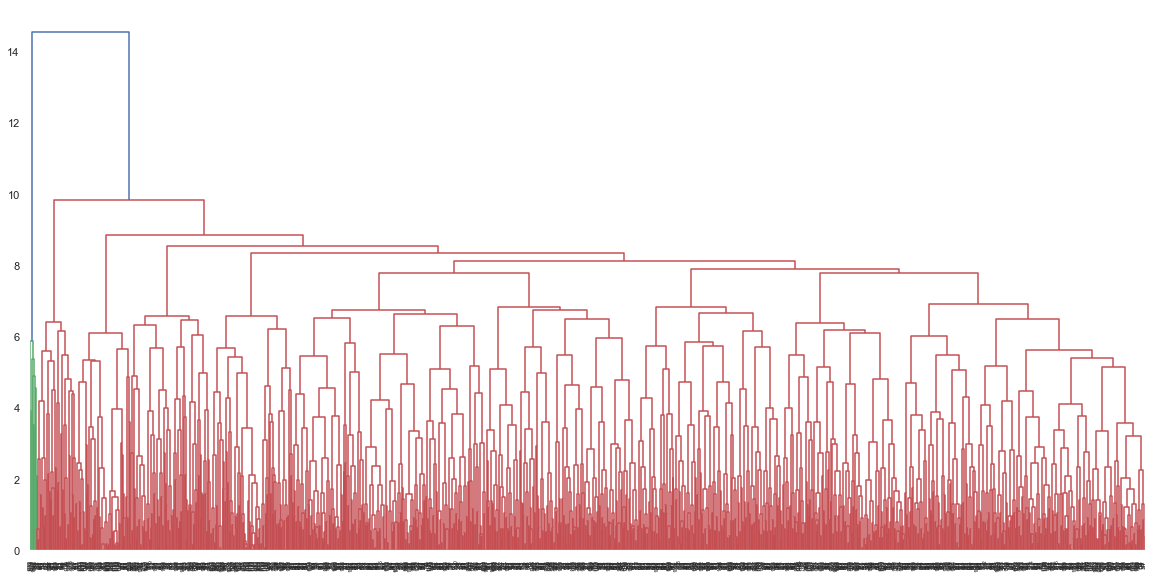

In [18]:
# visualize dendrogram
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

In [19]:
# examine silhouette score
round(metrics.silhouette_score(X_std, clusters, metric='euclidean'), 3)

0.039

### 3. Average - it tends to create larger groups than the complete method. Moreover, the clusters can be different sizes and shapes in contrast to the Ward method.

In [20]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

In [51]:
n_clusters = []

for i in [5, 20, 50, 75, 100, 300, 500, 700]:
    # Defining the agglomerative clustering
    # remember, ward only works with Euclidian
    agg_cluster = AgglomerativeClustering(linkage='average', 
                                         affinity='cosine',
                                          n_clusters=i)

    # Fit model
    clusters = agg_cluster.fit_predict(X_std)
    
    n_clusters.append(round(metrics.silhouette_score(X_std, clusters, metric='euclidean'), 3))

In [52]:
n_clusters

[0.154, 0.292, 0.373, 0.366, 0.379, 0.362, 0.34, 0.299]

In [63]:
agg_cluster = AgglomerativeClustering(linkage='average', 
                                     affinity='cosine',
                                      n_clusters=100)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

In [64]:
pd.Series(clusters).value_counts().shape

(100,)

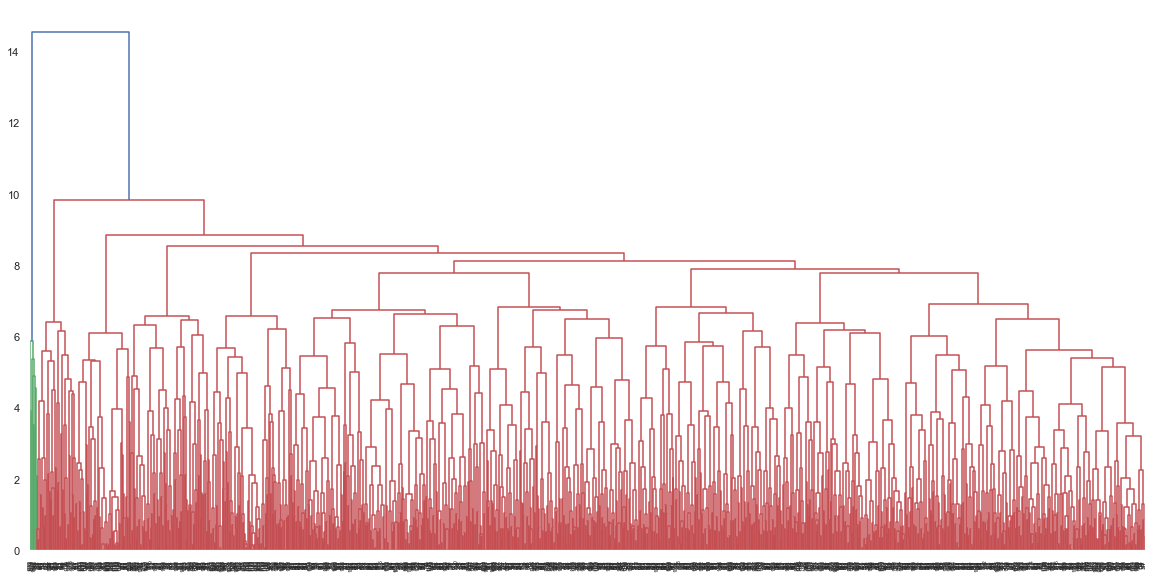

In [21]:
# visualize dendrogram
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

In [22]:
# examine silhouette score
round(metrics.silhouette_score(X_std, clusters, metric='euclidean'), 3)

0.037